In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-b45fbdad-7c98-dd37-b60e-0decfd07ecf5)


## Deep Learning

Here, we will perform Regression on LiDAR images using VGG16 and ResNet50v2. Later, we apply GradCAM on the better performing model.


##Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget "https://uwoca-my.sharepoint.com/:u:/g/personal/cbravoro_uwo_ca/Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1" #downloads the data
!mv /content/Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1 /content/data.tar.gz #rename
!tar xvzf data.tar.gz #decompressed


Streaming output truncated to the last 5000 lines.
LIDAR/LIDAR_44106.png
LIDAR/LIDAR_44923.png
LIDAR/LIDAR_53196.png
LIDAR/LIDAR_8048.png
LIDAR/LIDAR_15465.png
LIDAR/LIDAR_30877.png
LIDAR/LIDAR_2042.png
LIDAR/LIDAR_60609.png
LIDAR/LIDAR_34366.png
LIDAR/LIDAR_41583.png
LIDAR/LIDAR_28125.png
LIDAR/LIDAR_58223.png
LIDAR/LIDAR_48019.png
LIDAR/LIDAR_28588.png
LIDAR/LIDAR_57918.png
LIDAR/LIDAR_39447.png
LIDAR/LIDAR_19309.png
LIDAR/LIDAR_57428.png
LIDAR/LIDAR_46093.png
LIDAR/LIDAR_46502.png
LIDAR/LIDAR_7744.png
LIDAR/LIDAR_35079.png
LIDAR/LIDAR_17913.png
LIDAR/LIDAR_37680.png
LIDAR/LIDAR_43946.png
LIDAR/LIDAR_39855.png
LIDAR/LIDAR_44976.png
LIDAR/LIDAR_45309.png
LIDAR/LIDAR_60868.png
LIDAR/LIDAR_34691.png
LIDAR/LIDAR_46933.png
LIDAR/LIDAR_23102.png
LIDAR/LIDAR_32937.png
LIDAR/LIDAR_58215.png
LIDAR/LIDAR_40345.png
LIDAR/LIDAR_44265.png
LIDAR/LIDAR_36266.png
LIDAR/LIDAR_27579.png
LIDAR/LIDAR_61794.png
LIDAR/LIDAR_42679.png
LIDAR/LIDAR_33577.png
LIDAR/LIDAR_44072.png
LIDAR/LIDAR_23951.png
LIDAR/

In [ ]:
import pandas as pd

df_data = pd.read_csv("EmbeddingData_C3_9528.csv")


In [ ]:
df_data.head()

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,income,employment,education,health,crime,barriers,living_environment
0,48552,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902
1,46571,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902
2,21161,E01000487,Brent 006E,7b,Young ethnic communities,E02000098,Brent 006,E09000005,Brent,4a1r,Ethnically Diverse Metropolitan Living,0.123,0.068,7.192,-0.782,0.109,40.432,21.233
3,26188,E01004572,Wandsworth 016A,6a,Inner city cosmopolitan,E02000938,Wandsworth 016,E09000032,Wandsworth,5a1r,London Cosmopolitan,0.142,0.090,8.750,-0.328,1.062,35.035,21.583
4,46276,E01033320,Lewisham 017E,6a,Inner city cosmopolitan,E02000669,Lewisham 017,E09000023,Lewisham,4a1r,Ethnically Diverse Metropolitan Living,0.125,0.105,7.185,-0.143,0.133,32.410,38.222


In [ ]:
df_data.education.sort_values() # To see the values and perform data analysis

26191     0.013
22240     0.013
1856      0.013
18918     0.013
26750     0.013
          ...  
19555    57.186
18153    57.186
2999     58.976
26879    58.976
35423    58.976
Name: education, Length: 36723, dtype: float64

In [ ]:
df_index = df_data
df_index['Image'] = df_index.apply(lambda x: "LIDAR_" + str(x["id"])+ ".png", axis = 1)

In [ ]:
# df_index.drop(["LSOA11CD",	"LSOA11NM",	"SOAC11CD",	"SOAC11NM",	"MSOA11CD",	"MSOA11NM",	"LAD17CD",	"LAD17NM",
#               "LACCD",	"LACNM",	"income",	"employment", "health","crime" ,	"barriers",	"living_environment"], axis = 1, inplace = True)

df_index.head()

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,income,employment,education,health,crime,barriers,living_environment,Image
0,48552,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902,LIDAR_48552.png
1,46571,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902,LIDAR_46571.png
2,21161,E01000487,Brent 006E,7b,Young ethnic communities,E02000098,Brent 006,E09000005,Brent,4a1r,Ethnically Diverse Metropolitan Living,0.123,0.068,7.192,-0.782,0.109,40.432,21.233,LIDAR_21161.png
3,26188,E01004572,Wandsworth 016A,6a,Inner city cosmopolitan,E02000938,Wandsworth 016,E09000032,Wandsworth,5a1r,London Cosmopolitan,0.142,0.090,8.750,-0.328,1.062,35.035,21.583,LIDAR_26188.png
4,46276,E01033320,Lewisham 017E,6a,Inner city cosmopolitan,E02000669,Lewisham 017,E09000023,Lewisham,4a1r,Ethnically Diverse Metropolitan Living,0.125,0.105,7.185,-0.143,0.133,32.410,38.222,LIDAR_46276.png


In [ ]:
# df_index.sort_values(by=['education'])

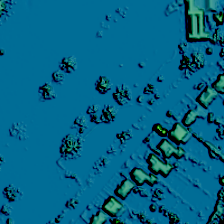

In [ ]:
from IPython.display import Image
Image(filename='/content/LIDAR/LIDAR_28924.png') 

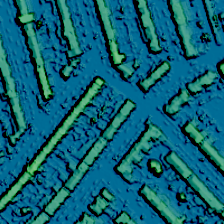

In [ ]:
Image(filename='/content/LIDAR/LIDAR_40501.png') 

In [ ]:
# Dividing the data into train, test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_index, 
                               test_size = 0.2,
                               random_state = 251139213)

In [ ]:
train.head()

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,income,employment,education,health,crime,barriers,living_environment,Image
9685,33910,E01004076,Sutton 011A,3d,Households in terraces and flats,E02000850,Sutton 011,E09000029,Sutton,8b1r,City Periphery,0.117,0.082,14.066,-0.463,-0.090,35.389,21.950,LIDAR_33910.png
32829,14964,E01002211,Harrow 028A,7b,Young ethnic communities,E02000460,Harrow 028,E09000015,Harrow,4a1r,Ethnically Diverse Metropolitan Living,0.193,0.136,20.345,-0.274,0.540,35.646,14.871,LIDAR_14964.png
27232,37277,E01002002,Haringey 031C,6a,Inner city cosmopolitan,E02000427,Haringey 031,E09000014,Haringey,5a1r,London Cosmopolitan,0.183,0.125,12.970,0.291,2.377,44.794,41.889,LIDAR_37277.png
33720,50423,E01003693,Redbridge 035D,7b,Young ethnic communities,E02006924,Redbridge 035,E09000026,Redbridge,4a1r,Ethnically Diverse Metropolitan Living,0.111,0.058,9.894,-0.896,0.530,22.627,22.131,LIDAR_50423.png
21571,27218,E01004194,Sutton 008E,3d,Households in terraces and flats,E02000847,Sutton 008,E09000029,Sutton,8b1r,City Periphery,0.073,0.066,7.416,-0.573,-0.092,22.046,17.118,LIDAR_27218.png


In [ ]:
test.head()

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,income,employment,education,health,crime,barriers,living_environment,Image
31436,28325,E01000262,Barnet 017D,7a,Urban cultural mix,E02000040,Barnet 017,E09000003,Barnet,4a1r,Ethnically Diverse Metropolitan Living,0.094,0.046,7.639,-1.535,-0.404,34.821,15.179,LIDAR_28325.png
4054,54776,E01000748,Bromley 042C,8a,Affluent communities,E02006789,Bromley 042,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.037,0.037,12.772,-1.401,-0.294,45.766,22.504,LIDAR_54776.png
26549,42044,E01003338,Lewisham 006A,6a,Inner city cosmopolitan,E02000658,Lewisham 006,E09000023,Lewisham,4a1r,Ethnically Diverse Metropolitan Living,0.216,0.125,22.219,0.243,1.237,37.349,33.187,LIDAR_42044.png
28273,14518,E01002629,Hounslow 011E,7b,Young ethnic communities,E02000536,Hounslow 011,E09000018,Hounslow,4a1r,Ethnically Diverse Metropolitan Living,0.149,0.081,8.379,-0.036,0.435,38.367,32.640,LIDAR_14518.png
32480,57874,E01000079,Barking and Dagenham 009E,7a,Urban cultural mix,E02000010,Barking and Dagenham 009,E09000002,Barking and Dagenham,4a1r,Ethnically Diverse Metropolitan Living,0.227,0.141,24.526,0.045,0.253,48.007,29.325,LIDAR_57874.png


## VGG16

The VGG 16 model is a classic model in Deep Learning. It is a 16 layer model.

This model was trained over the ImageNet data, thus looking to classify among 1000 different types of objects, over a very large database of images. We can leverage these already-trained weights, and  adapt just the last few layers for our purposes.

We start by loading the VGG16 model and by first loading the model on-the-fly using the library. 

We also need a package that allows for an efficient storage of the model using a binary format. The package is called [h5py](https://www.h5py.org/) and also allows for storing your pre-trained models.

In [ ]:
import numpy as np
import h5py as h5py
import PIL

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights = 'imagenet',      # The weights from the ImageNet competition
              include_top = False,       # Do not include the top layer, which classifies.
              input_shape= (224, 224, 3) # Input shape. Three channels, and BGR (NOT RGB!!!)
             )

58900480/58889256 [==============================] - 1s 0us/step


This will download the model and save it to our unoriginally named variable model.

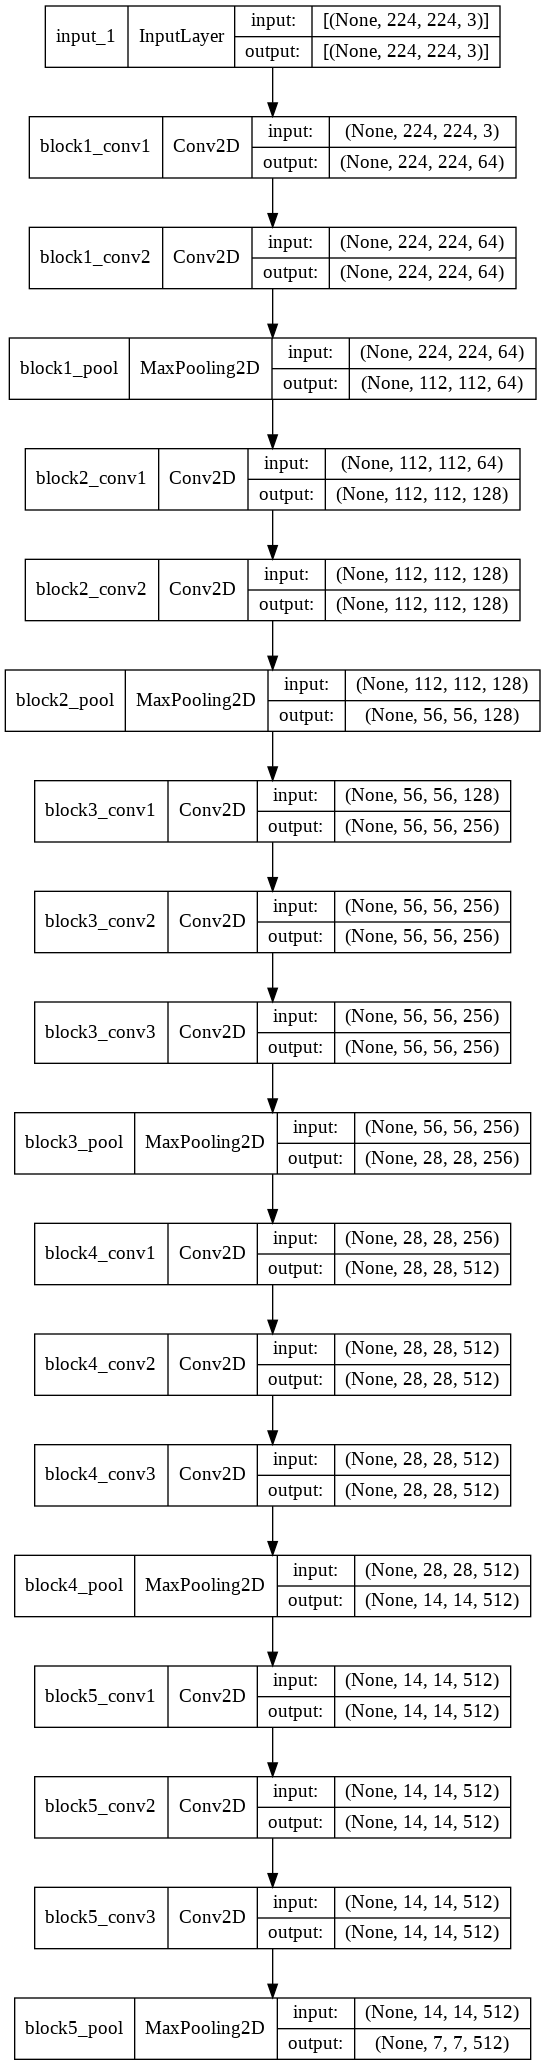

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, show_shapes=True, show_layer_names=True, to_file='GraphModel.png')
Image(retina=True, filename='GraphModel.png')

At this point, every single parameter is trainable. We don't need this, as we want to use the parameters that come with the model. We will create a parallel model to store the new trainable layers, and then set all of these layers as untrainable. We will finally add a Dense layer with 128 neurons, plus a Dense layer with two classes.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *


In [ ]:
# Create new model
CBModel = Sequential()

# Copy the layers to our new model. This needs to be done as there is a bug in Keras.
for layer in model.layers:
    CBModel.add(layer)

# Set the layers as untrainable
for layer in CBModel.layers:
    layer.trainable = False

In [ ]:
CBModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
CBModel.layers[15].name

'block5_conv2'

In [ ]:
# Set layer as trainable.
CBModel.layers[15].trainable = True
CBModel.layers[16].trainable = True

In [ ]:
# We now add the new layers for prediction.
CBModel.add(Flatten(input_shape=model.output_shape[1:]))
CBModel.add(Dense(128, activation = 'relu'))
CBModel.add(Dropout(0.5))
CBModel.add(Dense(128, activation = 'relu'))
CBModel.add(Dropout(0.5))
CBModel.add(Dense(1, activation = 'relu')) # For Education # All positive values

In [ ]:
# How does the model look like?
CBModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
# Compiling the model!
import tensorflow.keras as keras
CBModel.compile(loss=keras.losses.MeanSquaredError(), # MSE for Regression loss
              optimizer=optimizers.Adam(learning_rate=1e-5,            # Learning rate needs to be tweaked for convergence and be small!
                      decay=1e-3 / 200    # Decay of the LR 10^-3 / 1 / 50 / 100 / 200
                      ),
              metrics = [keras.metrics.mean_squared_error],
              )


A generator takes images from a directory, and feeds them to the model as needed. **This is necessary to work with big data**. We cannot expect the datasets we work here to fit in memory, so we take the images as needed.

We will first build two image generators (one for testing and one for training), which will generate new samples on the fly using our pictures as input.

We will also conduct **data augmentation**, which are a series of mathematical operations over the datasets to make them search more complex patterns. If you use augmentation, learning will take longer but be more robust. The process to work with this data is the following:

1. Create an [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) object which will process the images and load them as needed.

2. Call the ```flow_from_dataframe``` from our generator which will split the data into two parts, one for training and one for validation.

In [ ]:
# prepare data augmentation configuration. One for train, one for test.
train_datagen = ImageDataGenerator(
                                  rescale=1./255 ,                         # NNets like small inputs. Rescale.
                                  shear_range=0,                          # Shear? As satellite images 
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=True,                     # Flip horizontally?
                                  vertical_flip=True,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=1./255 ,                       # NNets like small inputs. Rescale.
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                  # Flip horizontally?
                                  vertical_flip=False,                    # Flip vertically?
                                  preprocessing_function=preprocess_input,# VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0                    # No validation cut for test.
                                  )


# We will use a batch size of 256. Depends on RAM of GPU.
batch_size = 256


# Train data generator. We point to the training directory!
# train_data_dir = 'IntelClassification/seg_train'

# VGG requires 224 x 224 images.
(img_height, img_width) = (224, 224)

train_generator = train_datagen.flow_from_dataframe(
                                                    dataframe = train,
                                                    directory = 'LIDAR', # where pics are
                                                    x_col = 'Image',
                                                    y_col = 'education' ,
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode
                                                    subset = 'training',                 # What subset to use
                                                    shuffle = True                       # Shuffle the data
                                                    )

validation_generator = train_datagen.flow_from_dataframe(
                                                    dataframe = train,
                                                    directory = 'LIDAR', # where pics are
                                                    x_col = 'Image',
                                                    y_col = 'education' ,                     # Where are the pics
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode - raw for regression
                                                    subset = 'validation',               # What subset to use
                                                    shuffle = True                       # Shuffle the data
                                                    )

# Test data generator.
# test_data_dir = 'IntelClassification/seg_test'
test_generator = test_datagen.flow_from_dataframe(
                                                  dataframe = test,
                                                  directory = 'LIDAR', # where pics are
                                                  x_col = 'Image',
                                                  y_col = 'education' ,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size, # Pass images one-by-one
                                                  class_mode='raw',
                                                  shuffle = False # Test set does NOT shuffle the data.
                                                  )

Found 23503 validated image filenames.
Found 5875 validated image filenames.
Found 7345 validated image filenames.


Now the system is ready to train from the images that we have loaded. We now feed the generators to the model, and ask to train for a certain number of epochs. We found the following datasets:

- Train: Found 23503 images .
- Validation: Found 5875 images.
- Test: Found 7345 images.


Now we can train the model. We will also add a **[callback](https://keras.io/api/callbacks/)**. Callbacks allow us to stop the training early if we reach convergence, save the model, create temporary plots... anything really. They are fairly powerful and quite necessary when we train big models. We will do two things:

1. Add an [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) callback to stop training once the validation error stays flat for a couple of epochs.
2. Add a [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/) callback that saves the weights of the model with the best performance automatically.

In [ ]:
# Define callbacks
import tensorflow as tf 
import os
checkpoint_path='/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/CBModel.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)
filename = 'Logs.csv'

my_callbacks = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=3),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
                
    tf.keras.callbacks.CSVLogger(filename, separator = "," , append = True)
]



In [ ]:
# os.path.dirname('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint')

'/content/drive/MyDrive/FM9528A_Coursework3_251139213'

In [ ]:
# Number of epochs
epochs = 15

# Train!
CBModel.fit(
            train_generator,
            epochs=epochs,
            validation_data=validation_generator,
            steps_per_epoch = 92, # Usually cases / batch_size = 91.8 Reduced to 32 so it runs faster.
            validation_steps = 23, # Number of validation steps. Again cases / batch_size = 22.9
            callbacks= my_callbacks
          )

Epoch 1/15
92/92 [==============================] - 477s 5s/step - loss: 103.7829 - mean_squared_error: 103.7829 - val_loss: 85.3854 - val_mean_squared_error: 85.3854
Epoch 2/15
92/92 [==============================] - 476s 5s/step - loss: 98.2869 - mean_squared_error: 98.2869 - val_loss: 81.4486 - val_mean_squared_error: 81.4486
Epoch 3/15
92/92 [==============================] - 472s 5s/step - loss: 96.1866 - mean_squared_error: 96.1866 - val_loss: 81.7626 - val_mean_squared_error: 81.7626
Epoch 4/15
92/92 [==============================] - 470s 5s/step - loss: 94.0650 - mean_squared_error: 94.0650 - val_loss: 80.5555 - val_mean_squared_error: 80.5555
Epoch 5/15
92/92 [==============================] - 471s 5s/step - loss: 92.4743 - mean_squared_error: 92.4743 - val_loss: 79.5528 - val_mean_squared_error: 79.5528
Epoch 6/15
92/92 [==============================] - 468s 5s/step - loss: 91.3091 - mean_squared_error: 91.3091 - val_loss: 79.3414 - val_mean_squared_error: 79.3414
Epoch 7/

The model is able to learn quite well! Checking the convergence plot.

In general, if we are seeing much higher validation loss than training loss, then it's a sign that your model is overfitting - it learns "superstitions" i.e. patterns that accidentally happened to be true in your training data but don't have a basis in reality, and thus aren't true in your validation data

If training loss much greater than validation loss. That is underfitting.
If training loss much less than validation loss. That is overfitting.

In [ ]:
# Saving the model
CBModel.save('/content/drive/MyDrive/FM9528A_Coursework3_251139213/VGG16.h5')

# Loading
# CBModel = keras.models.load_model('/content/drive/MyDrive/FM9528A_Coursework3_251139213/VGG16_Adam_Final.h5')


In [ ]:
l1 = CBModel.history.history['loss']
vl1 = CBModel.history.history['val_loss']

In [ ]:
# Number of epochs
epochs = 8

# Train!
CBModel.fit(
            train_generator,
            epochs=epochs,
            validation_data=validation_generator,
            steps_per_epoch = 92, # Usually cases / batch_size = 91.8 Reduced to 32 so it runs faster.
            validation_steps = 23, # Number of validation steps. Again cases / batch_size = 22.9
            callbacks= my_callbacks
          )

In [ ]:
l2 = CBModel.history.history['loss']
vl2 = CBModel.history.history['val_loss']

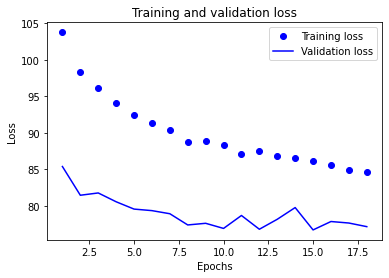

In [ ]:
loss = l1+l2[0:3]
val_loss = vl1 + vl2[0:3]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow.keras as keras

CBModel = keras.models.load_model('/content/drive/MyDrive/FM9528A_Coursework3_251139213/VGG16.h5')

In [ ]:
# Load the weights. THIS REQUIRES FIRST CREATING THE LOGIC.

CBModel.load_weights('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/CBModel.15-76.70.h5')

In [ ]:
# Applying to the test set with a generator.
test_generator.reset()

# Get probabilities
output = CBModel.predict(test_generator)

In [ ]:
output.reshape(-1)

array([ 7.2357106,  8.524901 , 19.085115 , ..., 16.474632 ,  5.402652 ,
        8.168507 ], dtype=float32)

In [ ]:
test_generator.labels

array([ 7.639, 12.772, 22.219, ..., 31.733,  0.696, 12.772])

In [ ]:
def mean_sq_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred)**2 )

In [ ]:
mse_res = mean_sq_error(test_generator.labels, output)
print(f'The mean squared error over the test is {mse_res}')

The mean squared error over the test is 134.5889583910144


## ResNet

In [ ]:
# Parameters
ImageSize = (224,224)
BatchSize = 128

In [ ]:
# Import base model. Using ResNet50v2.
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

# Import model with input layer
base_model = ResNet50V2(weights = 'imagenet',     # The weights from the ImageNet competition
                      include_top = False,       # Do not include the top layer, which classifies.
                      input_shape= (224, 224, 3) # Input shape. Three channels.
                      )

94683136/94668760 [==============================] - 2s 0us/step


Our process will be to:

1. Set the base model (ResNet) to non-trainable (freeze weights).
2. Add the new model.
3. Train only the top to convergence.
4. Unfreeze the weights to fine-tune.

These steps are needed to properly adjust the weights and are the recommended practice when finetunning more complex models, as [explained here](https://keras.io/guides/transfer_learning/). This website also has an example using Xception, another model.

In [ ]:
# Set the base model to untrainable.
base_model.trainable = False

In [ ]:
# Create the full model using the Model API
import tensorflow.keras as keras

# Input layer
inputs = keras.Input(shape=ImageSize + (3,),
                        name = 'image_only_input')

# Add the ResNet model, setting it to be untrainable. 
# First we store it on a temporary variable.
x = base_model(inputs, training=False)

# Flatten to make it the same size as the original model
x = Flatten()(x)

# Now we actually add it to a layer. Note the way of writing it.
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Add final output layer.
outputs = Dense(1, activation='relu')(x)

# Create the complete model object
ResModel = keras.Model(inputs, outputs)

In [ ]:
# This is what the model looks like now.
ResModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_only_input (InputLaye  [(None, 224, 224, 3)]    0         
 r)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                             

In [ ]:
# Compiling the model! Note the learning rate.
opt = optimizers.Adam(learning_rate=1e-5,            # Learning rate needs to be tweaked for convergence and be small!
                      decay=1e-3 / 200    # Decay of the LR 10^-3 / 1 / 50 / 100 / 200
                      ) 
ResModel.compile(loss=keras.losses.MeanSquaredError(), # This is NOT a classification problem!
                      optimizer=opt,
                      metrics = [keras.metrics.mean_squared_error],
                       )

In [ ]:
# Define parameters

target_size = (224, 224)
batch_size = 128
DataDir = 'LIDAR'

# Define generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                  rescale=None,                         # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=True,                     # Flip horizontally?
                                  vertical_flip=True,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # ResNet expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=None,                        # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  )

# Point to the data and **give the targets**. Note the "raw" class_mode
train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='LIDAR',  # Look from root directory
                                                    x_col='Image',   # Path to images
                                                    y_col='education',  # Target
                                                    target_size=target_size, # Same as last lab
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

validation_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='LIDAR',
                                                    x_col='Image',
                                                    y_col='education',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='validation',
                                                    interpolation="bilinear"
                                                   )

test_generator = test_datagen.flow_from_dataframe(test,
                                                  directory='LIDAR',
                                                  x_col='Image',
                                                  y_col='education',
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='raw',
                                                  interpolation="bilinear"
                                                  )

Found 23503 validated image filenames.
Found 5875 validated image filenames.
Found 7345 validated image filenames.


Now let's train! We can easily train this model by calling the fit function and passing the generator. This will **only** train the dense layers, as it is recommended first. It is always a good idea to first give the training parameters somewhere to start from. This is called **model warming up**. We can train the rest of the model in a second round.

You only need to give it a few rounds.

In [ ]:
# Define callbacks
import tensorflow as tf 
import os
checkpoint_path='/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/ResModel.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)
filename = 'Logs2.csv'

my_callbacks2 = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=3),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
                
    tf.keras.callbacks.CSVLogger(filename, separator = "," , append = True)
]



In [ ]:
# Number of epochs
epochs = 3

# Train!
ResModel.fit(
                  train_generator,
                  epochs=epochs,
                  validation_data=validation_generator,
                  steps_per_epoch = 184, # Usually cases / batch_size = 10.
                  validation_steps = 46, # Number of validation steps. Again cases / batch_size = 3.
                  callbacks = my_callbacks2
                  )

Epoch 1/3
184/184 [==============================] - 496s 3s/step - loss: 148.5081 - mean_squared_error: 148.5081 - val_loss: 102.2973 - val_mean_squared_error: 102.2973
Epoch 2/3
184/184 [==============================] - 464s 3s/step - loss: 125.7656 - mean_squared_error: 125.7656 - val_loss: 97.1081 - val_mean_squared_error: 97.1081
Epoch 3/3
184/184 [==============================] - 453s 2s/step - loss: 121.5963 - mean_squared_error: 121.5963 - val_loss: 95.0181 - val_mean_squared_error: 95.0181


In [ ]:
lr1 = ResModel.history.history['loss']
lr_val = ResModel.history.history['val_loss']

In [ ]:
lr1

[148.50807189941406, 125.76556396484375, 121.59626770019531]

In [ ]:
lr_val

[102.29725646972656, 97.10811614990234, 95.01813507080078]

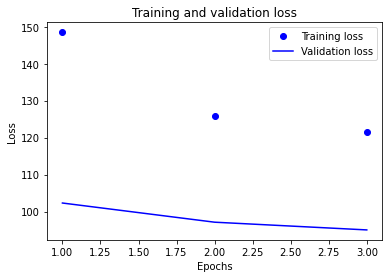

In [ ]:
loss = ResModel.history.history['loss']
val_loss = ResModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
ResModel.save('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Models/ResModel_warm.h5')


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


The model did not learn much, but we are only training the dense layers. Let's try to train now all layers.

In [ ]:
# Define callbacks
import tensorflow as tf 
import os
checkpoint_path='/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/ResModelFe2.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)
filename = 'Logs3.csv'

my_callbacks3 = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=3),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
                
    tf.keras.callbacks.CSVLogger(filename, separator = "," , append = True)
]



In [ ]:
base_model.trainable = True

# Recompile as we changed things.
ResModel.compile(loss=keras.losses.MeanSquaredError(), # This is NOT a classification problem!
                      optimizer=opt,
                      metrics = [keras.metrics.mean_squared_error],

                       )

# Number of epochs
epochs = 5

# Train!
ResModel.fit(
                  train_generator,
                  epochs=epochs,
                  validation_data=validation_generator,
                  steps_per_epoch = 184, # Usually cases / batch_size = 10. = 23503/128 = 183.61
                  validation_steps = 46, # Number of validation steps. Again cases / batch_size = 3. = 5875/128 = 45.89
                  callbacks = my_callbacks3

                  )

Epoch 1/5
184/184 [==============================] - 617s 3s/step - loss: 100.9013 - mean_squared_error: 100.9013 - val_loss: 76.4586 - val_mean_squared_error: 76.4586
Epoch 2/5
184/184 [==============================] - 558s 3s/step - loss: 99.0744 - mean_squared_error: 99.0744 - val_loss: 75.9061 - val_mean_squared_error: 75.9061
Epoch 3/5
184/184 [==============================] - 558s 3s/step - loss: 96.7607 - mean_squared_error: 96.7607 - val_loss: 80.5025 - val_mean_squared_error: 80.5025
Epoch 4/5
141/184 [=====================>........] - ETA: 1:49 - loss: 96.1709 - mean_squared_error: 96.1709

Keras gives us the full training history of the model, which we can use to track convergence. The following code plots this history.

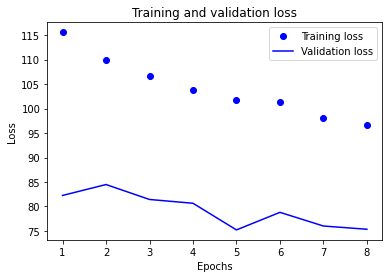

In [ ]:
# Plotting training history.
loss = ResModel.history.history['loss']
val_loss = ResModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
ResModel.save('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Models/ResModel_FullT.h5')


Further training our data

In [ ]:
import tensorflow.keras as keras

ResModel = keras.models.load_model('/content/drive/MyDrive/FM9528A_Coursework3_251139213/ResModel_FullT.h5')

In [ ]:
base_model.trainable = True

# Recompile as we changed things.
ResModel.compile(loss=keras.losses.MeanSquaredError(), # This is NOT a classification problem!
                      optimizer=opt,
                      metrics = [keras.metrics.mean_squared_error],

                       )

# Number of epochs
epochs = 15

# Train!
ResModel.fit(
                  train_generator,
                  epochs=epochs,
                  validation_data=validation_generator,
                  steps_per_epoch = 184, # Usually cases / batch_size = 10. = 23503/128 = 183.61
                  validation_steps = 46, # Number of validation steps. Again cases / batch_size = 3. = 5875/128 = 45.89
                  callbacks = my_callbacks3

                  )

Epoch 1/15
184/184 [==============================] - 636s 3s/step - loss: 100.5641 - mean_squared_error: 100.5641 - val_loss: 81.6307 - val_mean_squared_error: 81.6307
Epoch 2/15
184/184 [==============================] - 570s 3s/step - loss: 99.6896 - mean_squared_error: 99.6896 - val_loss: 76.9703 - val_mean_squared_error: 76.9703
Epoch 3/15
184/184 [==============================] - 565s 3s/step - loss: 96.4278 - mean_squared_error: 96.4278 - val_loss: 76.3962 - val_mean_squared_error: 76.3962
Epoch 4/15
184/184 [==============================] - 572s 3s/step - loss: 94.7535 - mean_squared_error: 94.7535 - val_loss: 76.9819 - val_mean_squared_error: 76.9819
Epoch 5/15
184/184 [==============================] - 568s 3s/step - loss: 95.8063 - mean_squared_error: 95.8063 - val_loss: 77.8694 - val_mean_squared_error: 77.8694
Epoch 6/15
184/184 [==============================] - 565s 3s/step - loss: 92.0491 - mean_squared_error: 92.0491 - val_loss: 75.4635 - val_mean_squared_error: 75.4

In [ ]:
lR = [100,99,96,94,95,92,91,91,87,87,88,86,85]
vlR = [81,76,76,76,77,75,76,75,81,82,72,77,77]

In [ ]:
Loss = [115.58602905273438,
 109.8603286743164,
 106.69586944580078,
 103.75898742675781,
 101.72020721435547,
 101.37633514404297,
 98.12415313720703,
 96.55558013916016]

Val_loss = [82.2503433227539,
 84.47977447509766,
 81.42951965332031,
 80.65293884277344,
 75.21021270751953,
 78.79944610595703,
 76.00736999511719,
 75.34436798095703]


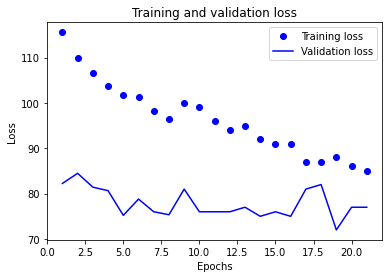

In [ ]:
# Plotting training history.
loss = Loss + lR
val_loss = Val_loss + vlR
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
ResModel.save('/content/drive/MyDrive/FM9528A_Coursework3_251139213/ResModel_FullTe2.h5')


Let's apply the model to our test data. For this we use the generator we just created.

In [ ]:
ResModel.load_weights('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/ResModelFe2.11-72.66.h5')


In [ ]:
# ResModel.load_weights('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/ResModelF.05-75.21.h5')
# ResModel.load_weights('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/ResModelFe2.08-75.41.h5')
# ResModel.load_weights('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/ResModelFe2.03-76.40.h5')


In [ ]:
# ResModel.load_weights('/content/drive/MyDrive/FM9528A_Coursework3_251139213/Checkpoint/ResModelFe2.03-76.40.h5')


In [ ]:
# Applying to the test set with a generator.
test_generator.reset()

# Get probabilities
output = ResModel.predict(test_generator)

In [ ]:
output.reshape(-1)

array([ 5.28932  , 10.581744 , 15.953831 , ..., 13.104308 ,  6.9865203,
        6.1362624], dtype=float32)

In [ ]:
def mean_sq_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred)**2 )

In [ ]:
mse2_res = mean_sq_error(test_generator.labels, output)
print(f'The mean squared error over the test is {mse2_res}')

The mean squared error over the test is 137.9188182606288


##GradCAM for ResNet50v2

In [ ]:
# The explainer. Gotten from https://keras.io/examples/vision/grad_cam/
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    from tensorflow import keras
    import tensorflow as tf
    # First, we create a model that maps the input image to the activations
    # of the last conv layer. This layer is located at model.layers[1] as the
    # ResNet model is the first "layer" of the ImageOnlyModel. Modify as needed.
    last_conv_layer = model.layers[1].get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.layers[1].inputs, last_conv_layer.output)
    print(last_conv_layer)
    print(last_conv_layer_model)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    regression_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = regression_input
    for layer_name in classifier_layer_names:
        try:
            x = model.get_layer(layer_name)(x)
        except:
            x = model.layers[1].get_layer(layer_name)(x)
    regression_model = keras.Model(regression_input, x)
    print(regression_model.summary())

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        print("last conv layer output:", last_conv_layer_output)
        tape.watch(last_conv_layer_output)
        # Compute predictions
        top_class_channel = regression_model(last_conv_layer_output)
        print("prediction:", top_class_channel)

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)
    print("gradients:", grads)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the regression
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]
        
    print(pooled_grads)

    # The channel-wise mean of the resulting feature map
    # is our heatmap of activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    # heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    print(heatmap)

    return heatmap

Now we can proceed as normal. Let's get the last convolutional layer and the top of the model.

In [ ]:
ResModel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_only_input (InputLaye  [(None, 224, 224, 3)]    0         
 r)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                           

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
# Set the layers.
last_conv_layer_name = "conv5_block3_3_conv"
classifier_layer_names =  ["flatten",
                           "dense",
                           "dropout",
                           "dense_1",
                           "dropout_1",
                           "dense_2"]

Now let's load a random image.

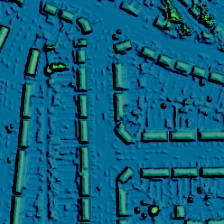

In [ ]:
# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

# Get the image in the right size
def get_img_array(img_path, size = (224, 224)):
    import tensorflow as tf
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    array = preprocess_input(array)
    return array

# Get an image
img_path = '/content/LIDAR/LIDAR_41687.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

Let's calculate the GradRAM estimate.

In [ ]:
ypred = ResModel.predict(preprocess_input(data))

In [ ]:
ypred

array([[13.055788]], dtype=float32)

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 7, 7, 2048)]      0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65 

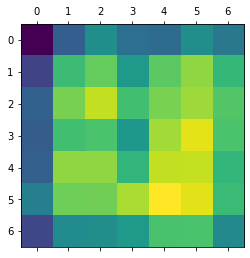

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    data, ResModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

And finally let's superimpose the heatmap of the image.

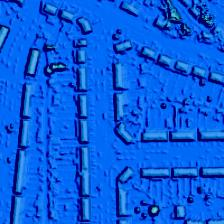

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "Img_Example.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))


## GradCAM for VGG

We will visualize the learning, to detect exactly what is happening.

Its a method that allows visualizing how one image activates the neural network. Basically we will look for the direction that the model used to get to its decisions. 

In [ ]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
# Get the image in the right size
def get_img_array(img_path, size = (224, 224)):
    import tensorflow as tf
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    array = preprocess_input(array)
    return array


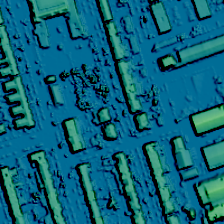

In [93]:
# Get an image
img_path = '/content/LIDAR/LIDAR_40500.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

In [94]:
# The explainer. Gotten from https://keras.io/examples/vision/grad_cam/
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    from tensorflow import keras
    import tensorflow as tf
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    regression_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = regression_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(regression_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [95]:
# Print the predictions
preds = CBModel.predict(preprocess_input(data/255))
print(preds)

[[6.3750825]]


In [ ]:
CBModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [96]:
# Set the layers.
last_conv_layer_name = "block5_conv3"
classifier_layer_names =  ["block5_pool", 
                           "flatten",
                           "dense",
                           "dense_1",
                           "dense_2",]

# classifier_layer_names =  ["block5_pool","flatten",
#                            "dense",
#                            "dropout",
#                            "dense_1",
#                            "dropout_1",
#                            "dense_2",]

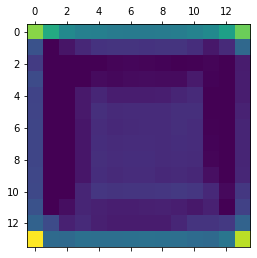

In [97]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data/255), CBModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

Now, to really visualize what's going on, we will superimpose the heatmap over the input. The following code does just that.

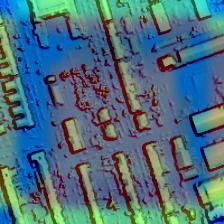

In [99]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)


# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "Img_Example.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))
